In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 19600)
# on indique la largeur et la longueur en paramètres
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
def remplissage(dataframe):
    taux_de_remplissage = (dataframe.count().sum())/dataframe.size
    print ("Le taux de remplissage du dataset de base est de{: .2%}".format(taux_de_remplissage))

    fig, ax = plt.subplots(figsize=(5,5))
    plt.title("Taux de remplissage du dataset de base", fontsize = 15)
    explode = (0.1, 0)
    ax.pie([taux_de_remplissage, 1-taux_de_remplissage], explode = explode, shadow=True)
    plt.legend(["Données présentes", "Données manquantes"])

In [4]:
DFF_France3 = pd.read_csv("DFF_France3.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'DFF_France3.csv'

In [ ]:
DFF_France3.head()

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
0,4,[ lentilles-vertes -> fr:lentilles-vertes ] ...,lentilles vertes,NaN,"Aliments et boissons à base de végétaux,Alimen...",en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...",Aliments et boissons à base de végétaux,Cereals and potatoes,Legumes,1 kg,bertrand-lejeune,Bertrand Lejeune,lentilles vertes,1441186657,"A compléter,Informations nutritionnelles à com...",France,5200016,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,6,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",fr:sables,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sablés,Sugary snacks,Biscuits and cakes,1 kg,st-michel,St Michel,Biscuits sablés fourrage au cacao,1462806432,"A vérifier,Complet,Informations nutritionnelle...",France,7730009,NaN,NaN,NaN,3.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,8,[ the-noir-de-chine -> fr:the-noir-de-chine ...,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,"Aliments et boissons à base de végétaux,Boisso...",en:teas,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...",Thés,Beverages,Non-sugared beverages,75 g,alice-delice,Alice Délice,Thé de Noël aromatisé orange-cannelle,1370977431,"A vérifier,Complet,Informations nutritionnelle...",France,10090206,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,9,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"Sirops,Sirops-pour-ganache",en:syrups,"Sirops,Sirops pour ganache","en:syrups,fr:sirops-pour-ganache",Sirops,unknown,unknown,4 x 5 cl,alice-delice,Alice Délice,Sirops pour ganache macarons,1462616704,"A vérifier,Complet,Informations nutritionnelle...",France,10127735,NaN,NaN,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,10,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alice-delice,Alice Délice,Mini Confettis,1487325954,"A compléter,Informations nutritionnelles compl...",France,10187319,0.9,NaN,NaN,NaN,NaN,NaN,14.0,14.0,0.8,87.7,0.003937,0.01,0.6,1753.0,False


In [ ]:
variables_quantitatives_pertinentes = ['fiber_100g','carbohydrates_100g',
 'fat_100g',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition-score-uk_100g',
 'nutrition-score-fr_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'sodium_100g',
 'salt_100g',
 'proteins_100g',
 'energy_100g']

Imputation par KNN

In [ ]:
DFF_France3.shape

(70880, 34)

Il faut d'abord extraire les colonnes ne comportant aucune données manquantes pour ne entrainer notre KNN imputer avec un DataFrame rempli.

In [ ]:
DFFrempli = DFF_France3[DFF_France3[variables_quantitatives_pertinentes].isnull().sum(axis=1) ==0]
DFFrempli

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
6,15,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",en:sodas,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...",Sodas,Beverages,Sweetened beverages,15 cl,pepsi,Pepsi,"Pepsi, Nouveau goût !",1345024108,"A vérifier,Complet,Informations nutritionnelle...",France,40608754,0.000,10.40,0.0,2.0,0.0,0.0,2.0,13.0,0.00,10.40,0.010000,0.0254,0.000,177.0,False
9,20,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"Farine de _blé_, huile de colza, sucre, _oeufs...",d,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",en:cakes,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",Gâteaux,Sugary snacks,Biscuits and cakes,880 g,bijou,Bijou,Madeleines nature,1476947941,"A vérifier,Complet,Informations nutritionnelle...",France,10,1.500,55.00,23.0,5.0,0.0,1.0,12.0,12.0,2.50,26.00,0.259843,0.6600,6.000,1900.0,False
10,22,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"Farine de _blé_, _œufs_ frais, huile de colza,...",d,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",en:cakes,"Cakes aux raisins,Cakes,Gâteaux","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",Gâteaux,Sugary snacks,Biscuits and cakes,900 g,bijou,Bijou,Cakes Raisins,1481840144,"A vérifier,Complet,Informations nutritionnelle...",France,30,1.800,56.00,19.0,5.0,0.0,1.0,13.0,13.0,2.50,28.00,0.255906,0.6500,5.800,1768.0,False
11,24,[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",d,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",en:pastries,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",Pâtisseries,Sugary snacks,Biscuits and cakes,600 g,bijou,Bijou,Cakes aux Fruits,1468014954,"A vérifier,Complet,Informations nutritionnelle...",France,31,1.500,60.00,15.0,11.0,0.0,1.0,12.0,12.0,2.00,34.00,0.236220,0.6000,4.900,1670.0,False
13,26,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",e,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",en:pastries,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",Pâtisseries,Sugary snacks,Biscuits and cakes,660 g (30 pâtisseries),bijou,Bijou,Financiers aux Amandes,1480541444,"A vérifier,Complet,Informations nutritionnelle...",France,50,1.700,51.00,23.0,3.0,0.0,0.0,22.0,22.0,10.00,39.00,0.216535,0.5500,8.000,1868.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70858,94421,[ farine-de-ble -> fr:farine-de-ble ] [ far...,"Farine de _blé_ (52%), eau, huile de palme, su...",c,"Aliments et boissons à base de végétaux,Alimen...",en:breads,"Pains précuits,Surgelés,Entrées et snacks surg...","en:plant-based-foods-and-beverages,en:plant-ba...",Pains,Cereals and potatoes,Bread,210 g,kawan,Kawan,Mini Paratha,1486235963,"A vérifier,Complet,Informations nutritionnelle...",France,9556587103869,6.500,41.40,15.0,1.0,1.0,0.0,10.0,10.0,9.00,5.10,0.354331,0.9000,6.000,1309.0,False
70861,94431,[ jus-d-orange -> fr:jus-d-orange ] [ jus-d...,"Jus d'orange (dont pulpe 1,6%), jus de clément...",c,"Aliments et boissons à base de végétaux,Boisso...",en:fruit-juices,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...",Jus de fruits,Beverages,Fruit juices,1 L,cora,Cora,

In [ ]:
DFF_France3[DFF_France3['product_name'].isnull()]

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
27,99,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,1450696765,"A compléter,Informations nutritionnelles compl...",France,83164,1.5,16.2,3.8,NaN,NaN,NaN,-3.0,-3.0,1.4,0.5,0.236220,0.60000,9.3,586.0,False
159,368,NaN,NaN,c,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,1425915248,"A compléter,Informations nutritionnelles compl...",France,34780178000,NaN,3.9,10.0,NaN,NaN,NaN,6.0,6.0,7.0,3.9,0.043307,0.11000,3.1,489.0,False
209,478,NaN,NaN,c,"Surgelés,Plats préparés,Plats préparés surgelés",en:frozen-foods,Plats préparés surgelés,"en:frozen-foods,en:meals,en:frozen-ready-made-...",Surgelés,Composite foods,One-dish meals,265 g,amy-s-kitchen,Amy's Kitchen,NaN,1475931878,"A compléter,Informations nutritionnelles compl...",France,42272008520,2.0,35.0,6.0,NaN,NaN,NaN,9.0,9.0,4.0,2.0,0.590551,1.50000,7.0,1004.0,False
239,545,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,unknown,unknown,150 g,NaN,NaN,NaN,1455799581,"A compléter,Informations nutritionnelles compl...",France,517805,4.7,54.1,24.1,NaN,NaN,NaN,11.0,11.0,2.9,42.9,0.011811,0.03000,6.4,1958.0,False
353,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,340 g,NaN,NaN,NaN,1449401986,"A compléter,Informations nutritionnelles compl...",France,72252227849,NaN,65.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,1125.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70065,93086,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,unknown,unknown,375 ml,sodastream,Sodastream,NaN,1416860247,"A compléter,Informations nutritionnelles compl...",France,8718309253721,0.0,88.8,0.0,NaN,NaN,NaN,15.0,15.0,0.0,88.8,0.168000,0.42672,0.0,1510.0,False
70066,93087,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,unknown,unknown,375 ml,sodastream,Sodastream,NaN,1416860357,"A compléter,Informations nutritionnelles compl...",France,8718309253745,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
70538,93778,NaN,NaN,a,th:Biscuit-asiatique,th:biscuit-asiatique,Biscuit asiatique,th:biscuit-asiatique,th:Biscuit-asiatique,unknown,unknown,150 g,chao-sua,Chao sua,NaN,1471095027,"A compléter,Informations nutritionnelles compl...",France,8858945530036,3.0,20.0,13.0,NaN,NaN,NaN,-1.0,-1.0,2.5,13.0,0.007874,0.02000,5.0,930.0,False
70591,93852,NaN,NaN,NaN,"Aliments et boissons à base de végétaux,Alimen...",en:plant-based-foods-and-beverages,Nouilles instantanées,"en:plant-based-foods-and-beverages,en:plant-ba...",Aliments et boissons à base de végétaux,Cereals and potatoes,Cereals,NaN,NaN,NaN,NaN,1413059141,"A compléter,Informations nutritionnelles compl...",France,8934563167165,NaN,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1297.0,False


In [ ]:
DFFrempli.describe()

,Unnamed: 0,created_t,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
count,23468.000000,2.346800e+04,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,2.346800e+04
mean,45831.332751,1.426053e+09,2.734855,30.055867,11.438141,1.947588,0.083603,0.177476,5.971536,6.385759,4.325979,12.413201,0.355989,0.904206,7.088699,1.208811e+03
std,24925.342380,4.173017e+07,3.909706,27.261413,15.095410,2.528767,0.282135,0.485693,9.124077,8.908408,6.985097,17.255906,1.294538,3.288007,6.748313,2.123097e+04
min,15.000000,1.328784e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,25388.250000,1.393951e+09,0.500000,6.000000,1.100000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.200000,1.300000,0.023622,0.060000,1.900000,3.770000e+02
50%,43528.500000,1.428784e+09,1.800000,17.500000,5.200000,1.000000,0.000000,0.000000,3.000000,4.000000,1.400000,4.000000,0.200787,0.510000,5.900000,9.701000e+02
75%,64021.250000,1.460106e+09,3.500000,56.200000,17.000000,3.000000,0.000000,0.000000,13.000000,13.000000,5.400000,16.000000,0.429134,1.090000,9.600000,1.634000e+03
max,94481.000000,1.492723e+09,100.000000,100.000000,100.000000,21.000000,2.000000,5.000000,35.000000,35.000000,93.000000,100.000000,39.370079,100.000000,86.000000,3.251373e+06


In [ ]:
train = DFFrempli
train = train[variables_quantitatives_pertinentes]
train

,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
6,0.000,10.40,0.0,2.0,0.0,0.0,2.0,13.0,0.00,10.40,0.010000,0.0254,0.000,177.0
9,1.500,55.00,23.0,5.0,0.0,1.0,12.0,12.0,2.50,26.00,0.259843,0.6600,6.000,1900.0
10,1.800,56.00,19.0,5.0,0.0,1.0,13.0,13.0,2.50,28.00,0.255906,0.6500,5.800,1768.0
11,1.500,60.00,15.0,11.0,0.0,1.0,12.0,12.0,2.00,34.00,0.236220,0.6000,4.900,1670.0
13,1.700,51.00,23.0,3.0,0.0,0.0,22.0,22.0,10.00,39.00,0.216535,0.5500,8.000,1868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70858,6.500,41.40,15.0,1.0,1.0,0.0,10.0,10.0,9.00,5.10,0.354331,0.9000,6.000,1309.0
70861,0.600,10.20,0.5,0.0,0.0,0.0,-3.0,4.0,0.00,9.20,0.011811,0.0300,0.600,192.0
70865,0.005,95.87,1.3,4.0,0.0,1.0,4.0,4.0,1.28,0.12,0.001969,0.0050,0.040,1017.0
70870,1.470,95.31,1.3,5.0,0.0,1.0,2.0,2.0,1.28,0.10,0.000394,0.0010,0.004,1031.0


In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import spatial,stats

In [ ]:
pas = (DFF_France3.shape[0]/10)+1

Imputation par KNN imputer. Le temps d'imputation total est plus faible si on fait le très en 10 itérations. 

In [ ]:
test = DFF_France3[variables_quantitatives_pertinentes]
imputer = KNNImputer(n_neighbors=3)

for i in range(10):
    print(i)
    testi = test[int(i*pas):int((i+1)*pas)]
    scaler = StandardScaler().fit(testi)
    scaled_trained = scaler.transform(testi)
    knn_train = imputer.fit_transform(scaled_trained)
    filled_data = scaler.inverse_transform(knn_train)
    test[int(i*pas):int((i+1)*pas)] = filled_data
    # train_filled = pd.DataFrame(filled_data, columns=test.columns, index=test.index)
    

0


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

1


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

2


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

3


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

4


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

5


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

6


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

7


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

8


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

9


C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/3012456872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[int(i*pas):int((i+1)*pas)] = filled_data
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
DFF_FINAL = DFF_France3.copy()
DFF_FINAL[variables_quantitatives_pertinentes] = test
DFF_FINAL

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
0,4,[ lentilles-vertes -> fr:lentilles-vertes ] ...,lentilles vertes,NaN,"Aliments et boissons à base de végétaux,Alimen...",en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...",Aliments et boissons à base de végétaux,Cereals and potatoes,Legumes,1 kg,bertrand-lejeune,Bertrand Lejeune,lentilles vertes,1441186657,"A compléter,Informations nutritionnelles à com...",France,5200016,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False
1,6,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",fr:sables,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sablés,Sugary snacks,Biscuits and cakes,1 kg,st-michel,St Michel,Biscuits sablés fourrage au cacao,1462806432,"A vérifier,Complet,Informations nutritionnelle...",France,7730009,2.456667e+00,78.033333,3.720000,3.000000,0.0,1.000000e+00,13.0,17.000000,2.793333,40.100000,0.258331,0.656500,7.663333,1598.833333,False
2,8,[ the-noir-de-chine -> fr:the-noir-de-chine ...,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,"Aliments et boissons à base de végétaux,Boisso...",en:teas,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...",Thés,Beverages,Non-sugared beverages,75 g,alice-delice,Alice Délice,Thé de Noël aromatisé orange-cannelle,1370977431,"A vérifier,Complet,Informations nutritionnelle...",France,10090206,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False
3,9,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"Sirops,Sirops-pour-ganache",en:syrups,"Sirops,Sirops pour ganache","en:syrups,fr:sirops-pour-ganache",Sirops,unknown,unknown,4 x 5 cl,alice-delice,Alice Délice,Sirops pour ganache macarons,1462616704,"A vérifier,Complet,Informations nutritionnelle...",France,10127735,-2.220446e-16,31.400000,21.733333,4.000000,0.0,0.000000e+00,15.0,18.666667,5.110000,24.400000,12.160000,30.925733,28.433333,1479.666667,False
4,10,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alice-delice,Alice Délice,Mini Confettis,1487325954,"A compléter,Informations nutritionnelles compl...",France,10187319,9.000000e-01,97.033333,0.200000,0.666667,0.0,2.775558e-17,14.0,14.000000,0.800000,87.700000,0.003937,0.010000,0.600000,1753.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70875,94475,NaN,NaN,a,"Aliments et boissons à base de végétaux,Alimen...",en:breads,"Biscottes au sarrasin,Biscottes","en:plant-based-foods-and-beverages,en:plant-ba...",Pains,Cereals and potatoes,Bread,NaN,le-pain-des-fleurs,Le Pain des fleurs,Tartines craquantes bio au sarrasin,1437817626,"A compléter,Informations nutritionnelles compl...",France,9847548283004,5.900000e+00,74.800000,2.800000,1.333333,0.0,2.775558e-17,-4.0,-4.000000,0.600000,2.600000,0.267717,0.680000,13.000000,1643.000000,False
70876,94477,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,biosic,Biosic,Amandes,1491079938,"A compléter,Informations nutritionnelles compl...",France,9900000000233,1.220000e+01,27.806667,52.076667,4.333333,0.0,3.333333e-01,0.0,0.000000,3.730000,3.89000

Le taux de remplissage du dataset de base est de 100.00%


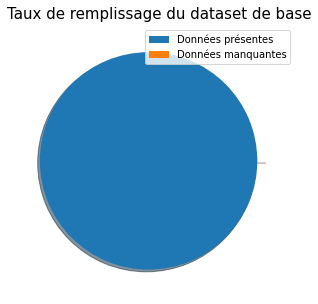

In [ ]:
remplissage(test)

Le taux de remplissage du dataset de base est de 92.42%


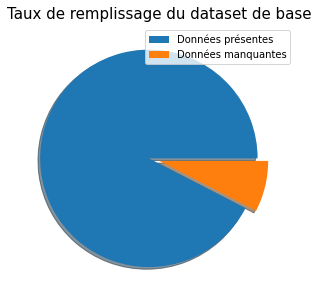

In [ ]:
remplissage(DFF_FINAL)


In [ ]:
DFF_FINAL_TEST = DFF_FINAL.copy()
DFF_FINAL['nutrition-score-fr_100g'].describe()

count    70880.000000
mean         8.220833
std          8.691769
min        -15.000000
25%          1.000000
50%          8.000000
75%         15.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [ ]:
DFF_FINAL['nutrition-score-fr_100g_etalon'] = ((40 - DFF_FINAL['nutrition-score-fr_100g'])*(100/55)).round(0)
DFF_FINAL['nutrition-score-fr_100g_etalon'].isna().sum()

0

In [ ]:
DFF_FINAL.head()

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g,nutrition-score-fr_100g_etalon
0,4,[ lentilles-vertes -> fr:lentilles-vertes ] ...,lentilles vertes,NaN,"Aliments et boissons à base de végétaux,Alimen...",en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...",Aliments et boissons à base de végétaux,Cereals and potatoes,Legumes,1 kg,bertrand-lejeune,Bertrand Lejeune,lentilles vertes,1441186657,"A compléter,Informations nutritionnelles à com...",France,5200016,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False,47.0
1,6,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",fr:sables,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sablés,Sugary snacks,Biscuits and cakes,1 kg,st-michel,St Michel,Biscuits sablés fourrage au cacao,1462806432,"A vérifier,Complet,Informations nutritionnelle...",France,7730009,2.456667e+00,78.033333,3.720000,3.000000,0.0,1.000000e+00,13.0,17.000000,2.793333,40.100000,0.258331,0.656500,7.663333,1598.833333,False,42.0
2,8,[ the-noir-de-chine -> fr:the-noir-de-chine ...,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,"Aliments et boissons à base de végétaux,Boisso...",en:teas,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...",Thés,Beverages,Non-sugared beverages,75 g,alice-delice,Alice Délice,Thé de Noël aromatisé orange-cannelle,1370977431,"A vérifier,Complet,Informations nutritionnelle...",France,10090206,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False,47.0
3,9,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"Sirops,Sirops-pour-ganache",en:syrups,"Sirops,Sirops pour ganache","en:syrups,fr:sirops-pour-ganache",Sirops,unknown,unknown,4 x 5 cl,alice-delice,Alice Délice,Sirops pour ganache macarons,1462616704,"A vérifier,Complet,Informations nutritionnelle...",France,10127735,-2.220446e-16,31.400000,21.733333,4.000000,0.0,0.000000e+00,15.0,18.666667,5.110000,24.400000,12.160000,30.925733,28.433333,1479.666667,False,39.0
4,10,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alice-delice,Alice Délice,Mini Confettis,1487325954,"A compléter,Informations nutritionnelles compl...",France,10187319,9.000000e-01,97.033333,0.200000,0.666667,0.0,2.775558e-17,14.0,14.000000,0.800000,87.700000,0.003937,0.010000,0.600000,1753.000000,False,47.0


Analyse univariée

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


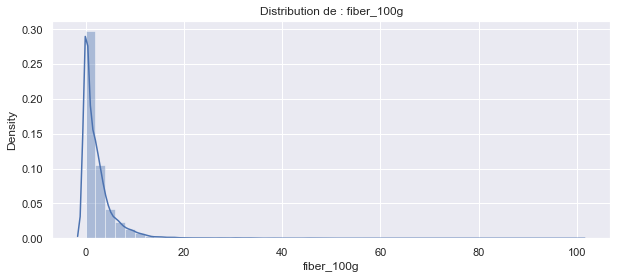

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


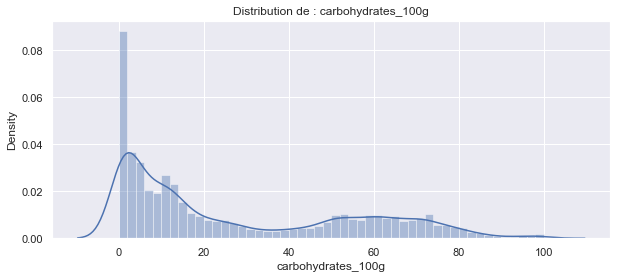

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


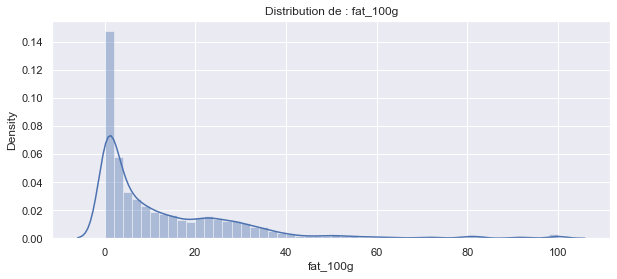

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


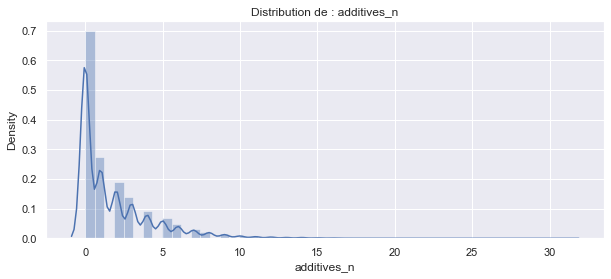

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


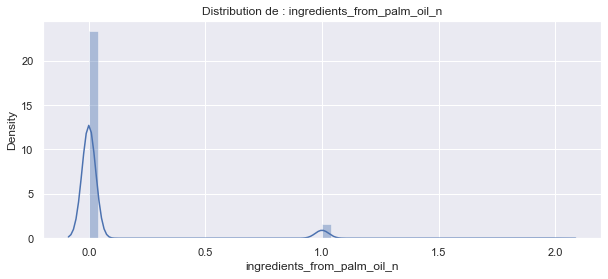

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


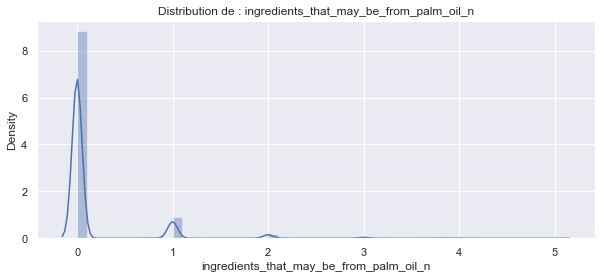

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


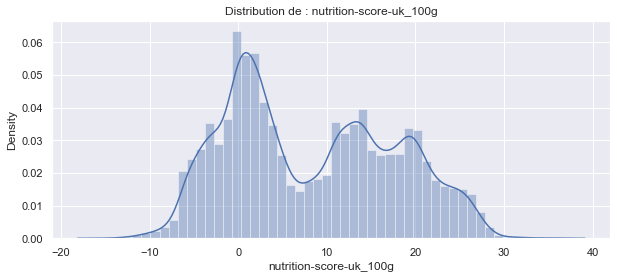

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


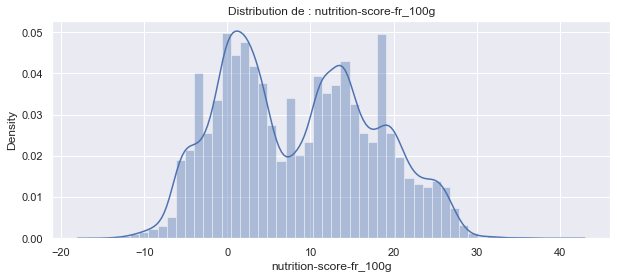

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


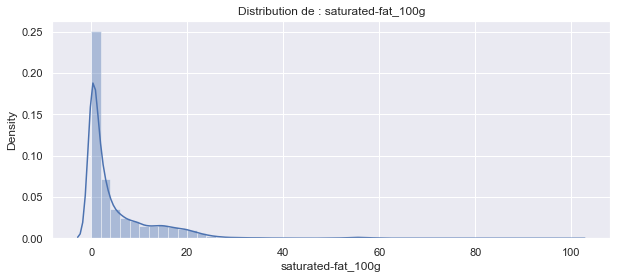

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


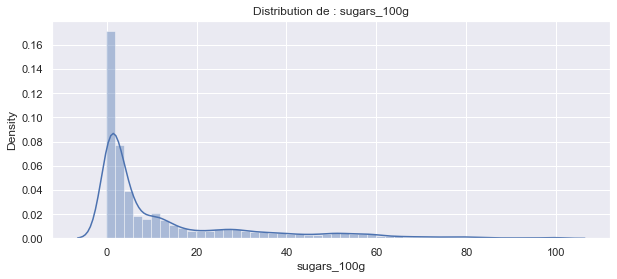

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


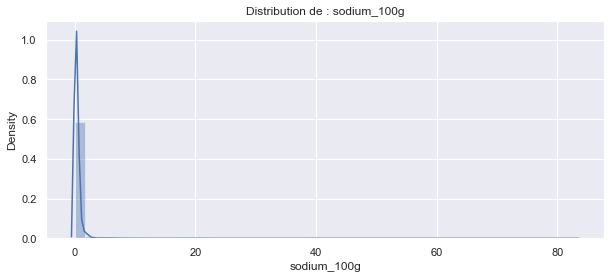

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


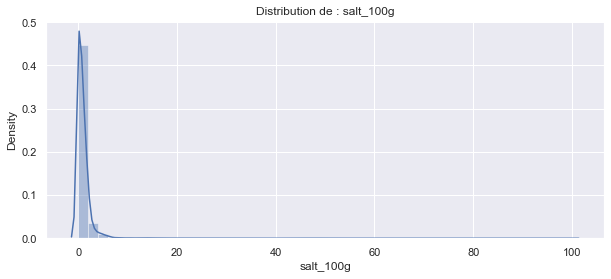

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


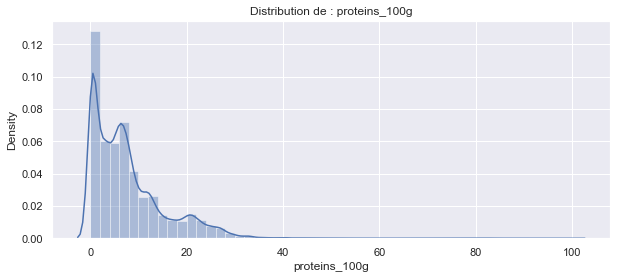

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


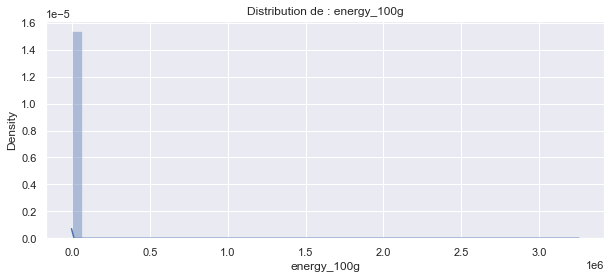

In [ ]:
for colonne in variables_quantitatives_pertinentes:
    plt.figure(figsize = (10,4))
    sns.set(font_scale=1)
    sns.distplot(DFF_France3[colonne], bins=50)
    titre = 'Distribution de : ' + colonne
    plt.title(titre)
    plt.xlabel(colonne)
    plt.show()

Quelques boîtes à moustaches

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-p

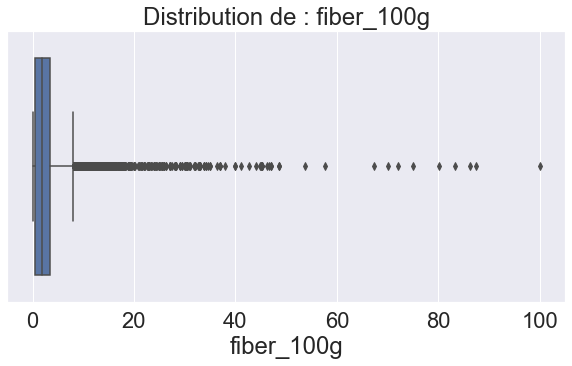

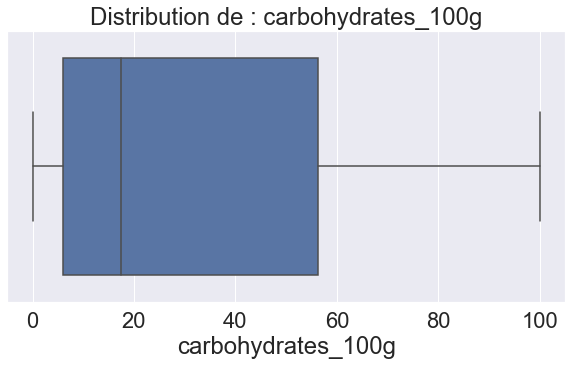

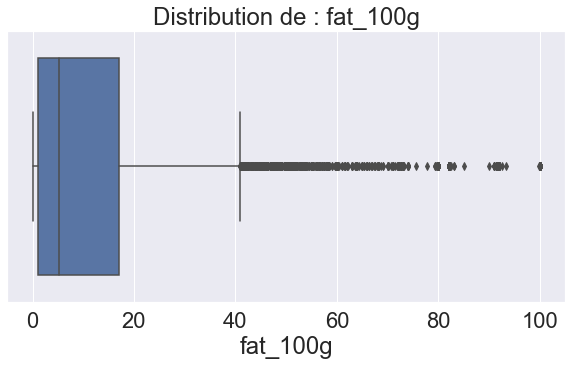

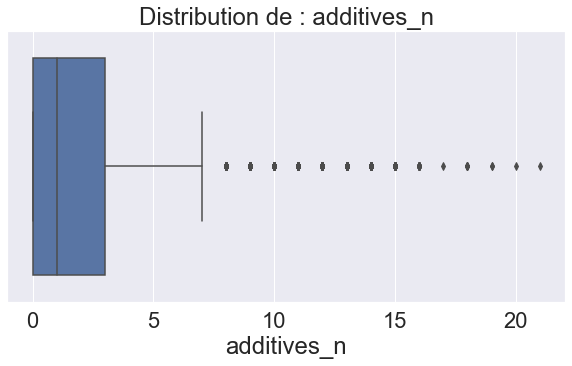

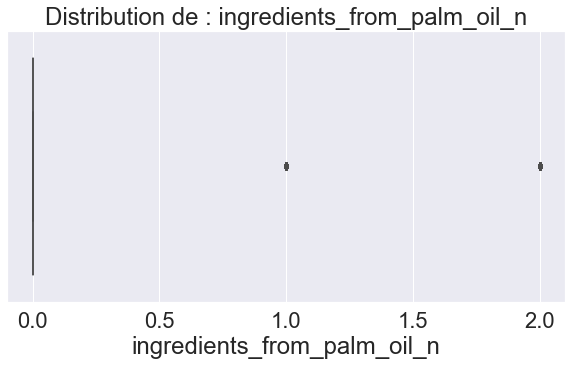

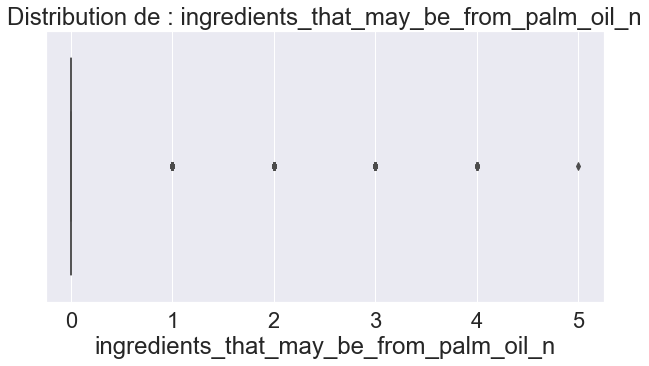

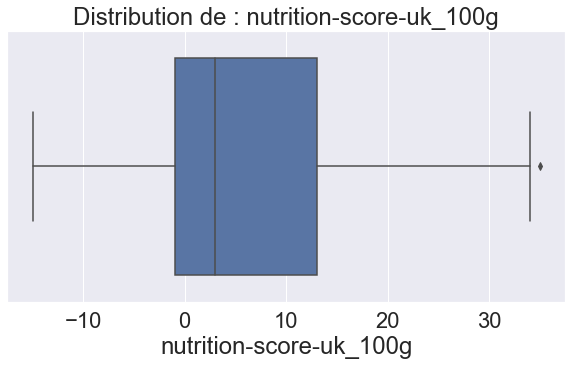

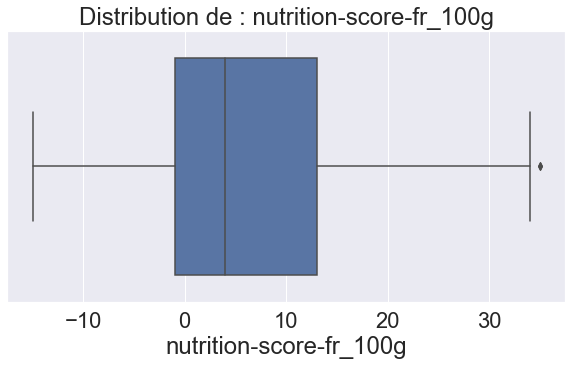

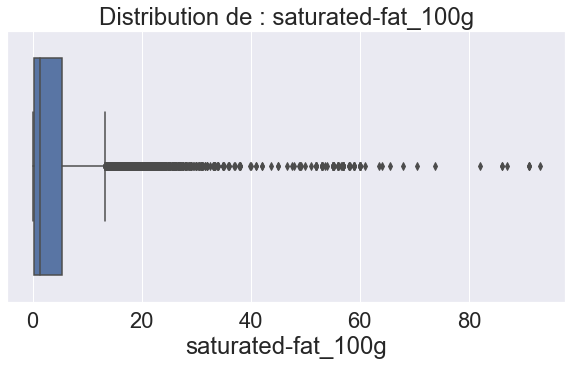

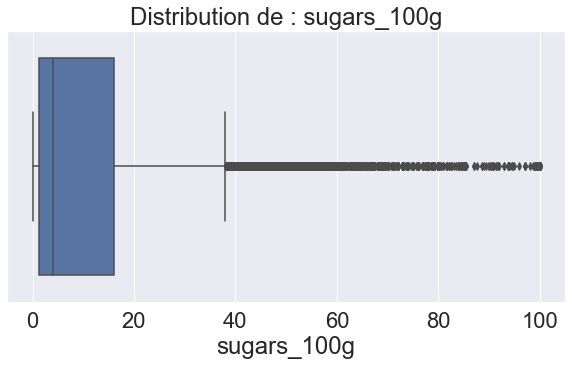

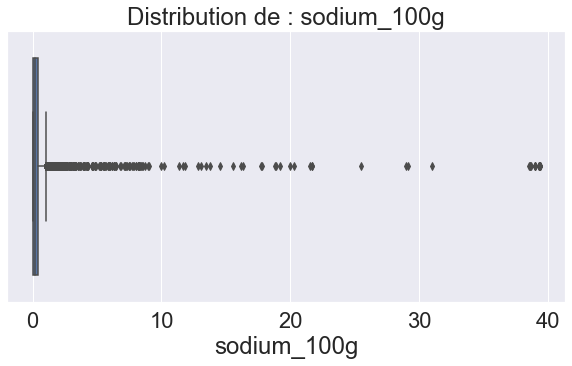

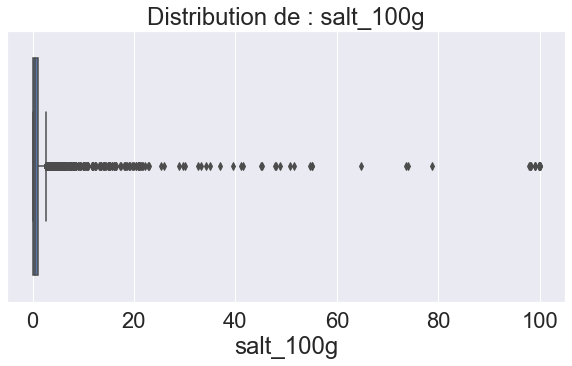

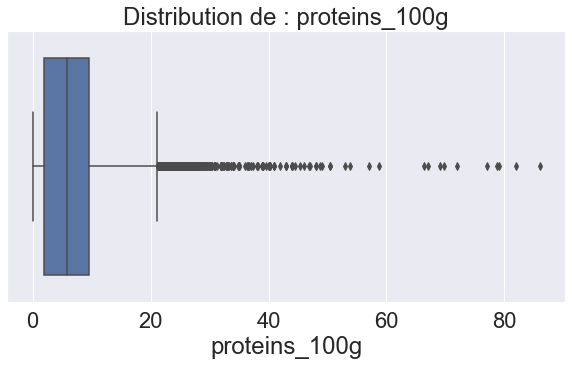

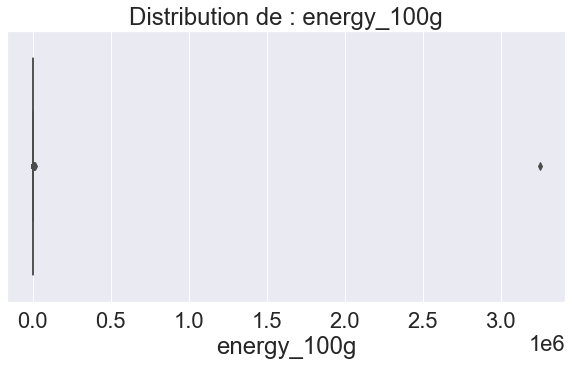

In [ ]:
sns.set (font_scale=2)
for colonnes in variables_quantitatives_pertinentes:
    plt.figure (figsize=(10,5))
    sns.boxplot(DFFrempli[colonnes])
    titre = "Distribution de : " + colonnes
    plt.title(titre)
    plt.xlabel(colonnes)


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-p

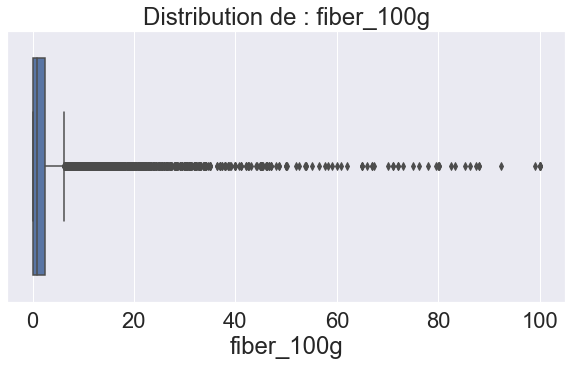

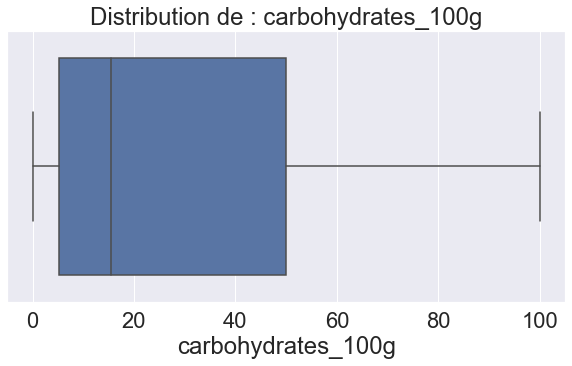

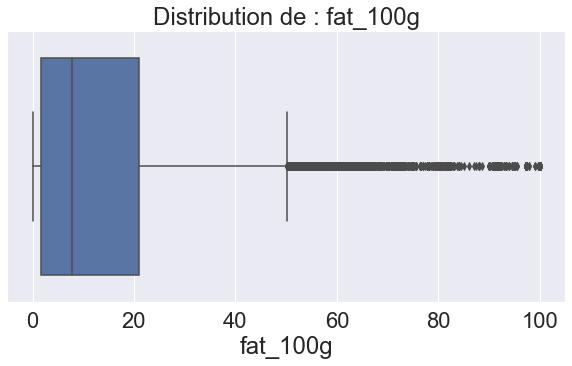

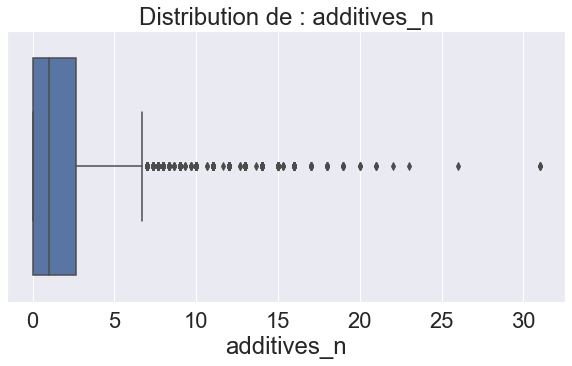

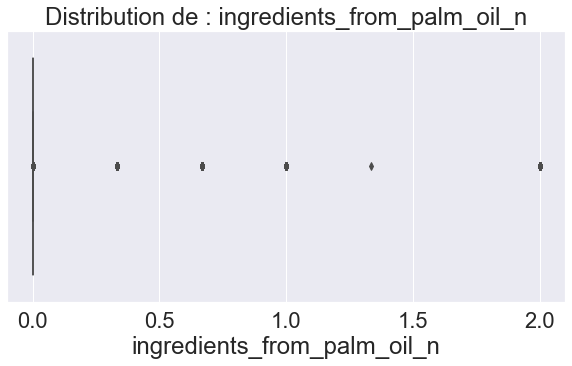

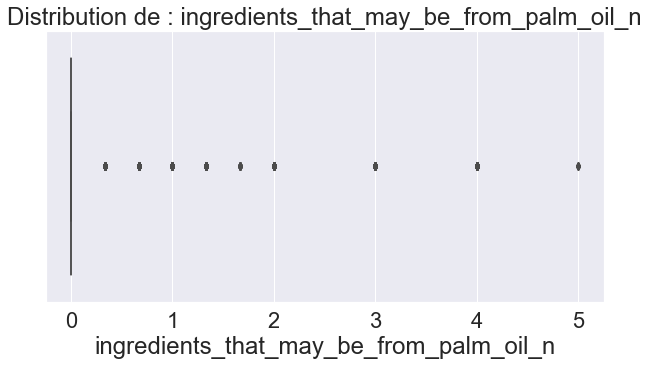

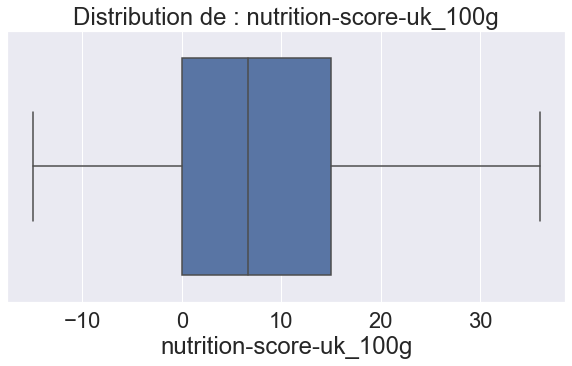

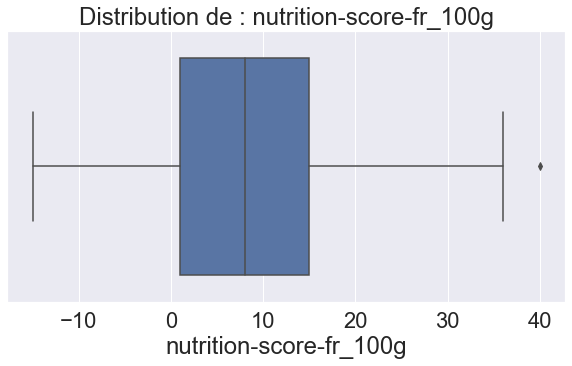

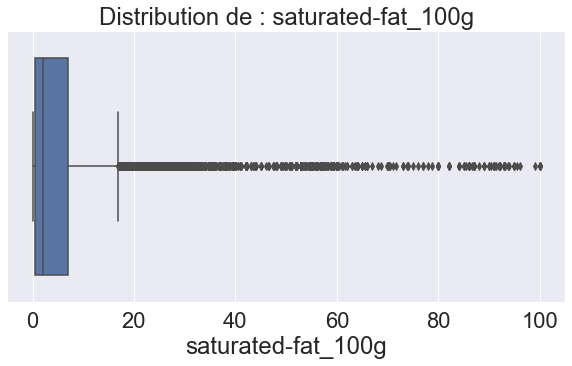

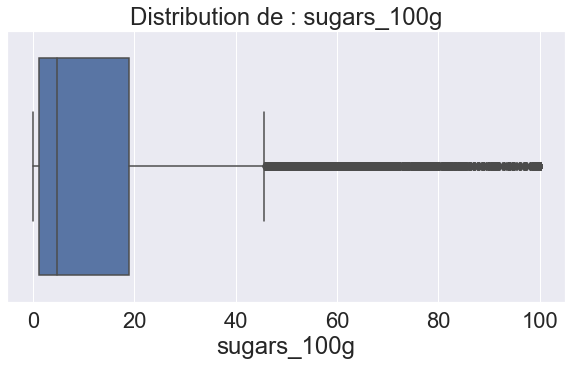

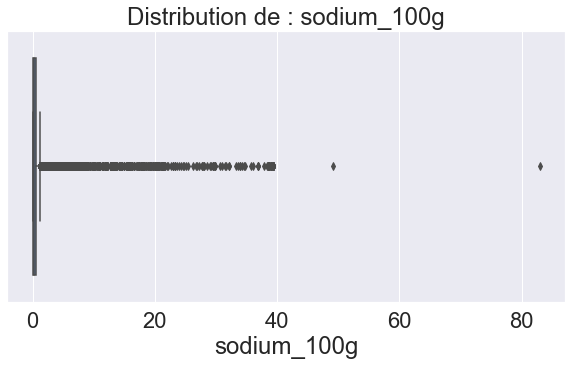

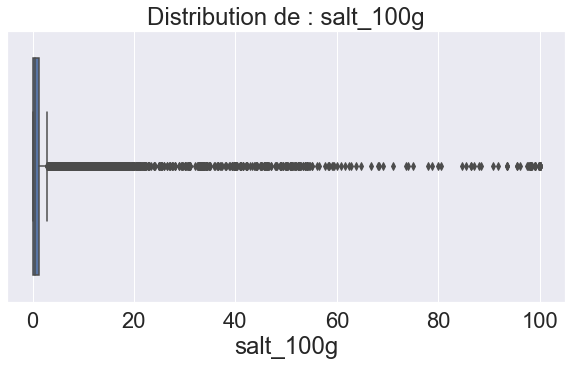

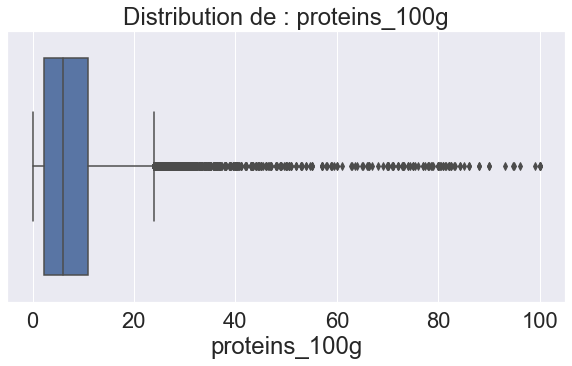

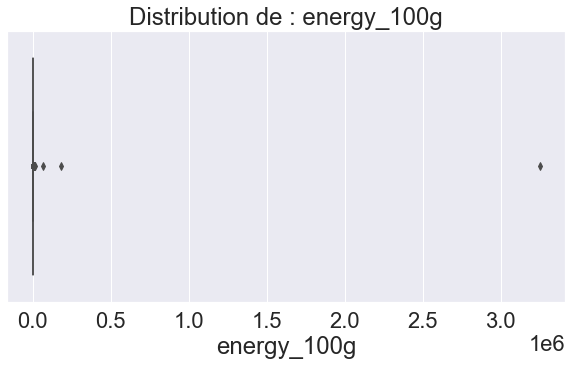

In [ ]:
sns.set (font_scale=2)
for colonnes in variables_quantitatives_pertinentes:
    plt.figure (figsize=(10,5))
    sns.boxplot(DFF_FINAL[colonnes])
    titre = "Distribution de : " + colonnes
    plt.title(titre)
    plt.xlabel(colonnes)

Matrice des corrélations

In [ ]:
DFF_FINAL['ingredients_from_palm_oil_n'].round(0).unique()

array([0., 1., 2.])

C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/1301641685.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


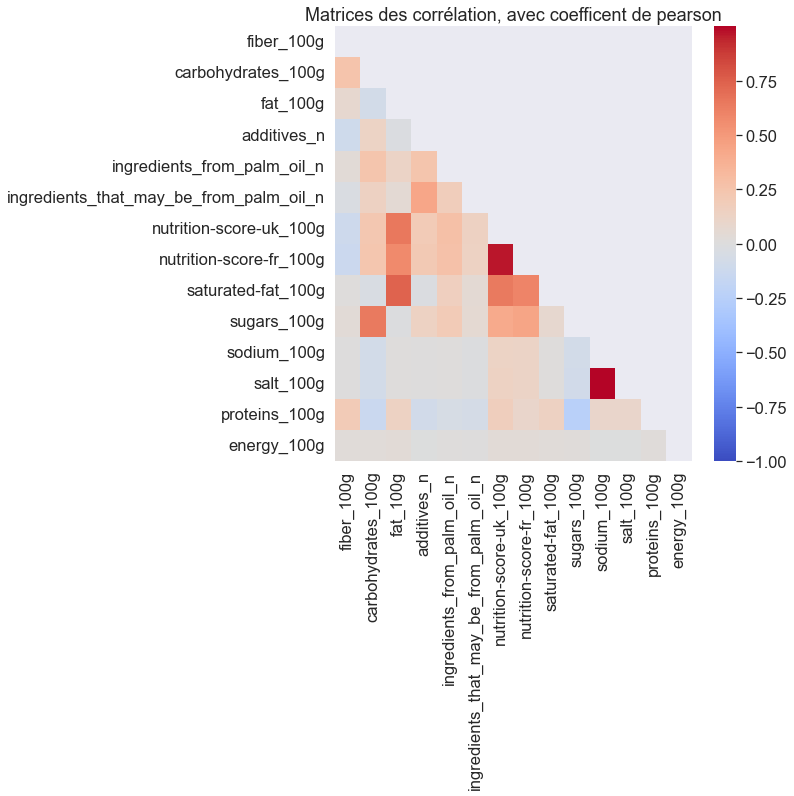

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrices des corrélation, avec coefficent de pearson')

corr = DFF_France3[variables_quantitatives_pertinentes].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

C:\Users\DELL\AppData\Local\Temp/ipykernel_17140/1406308685.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


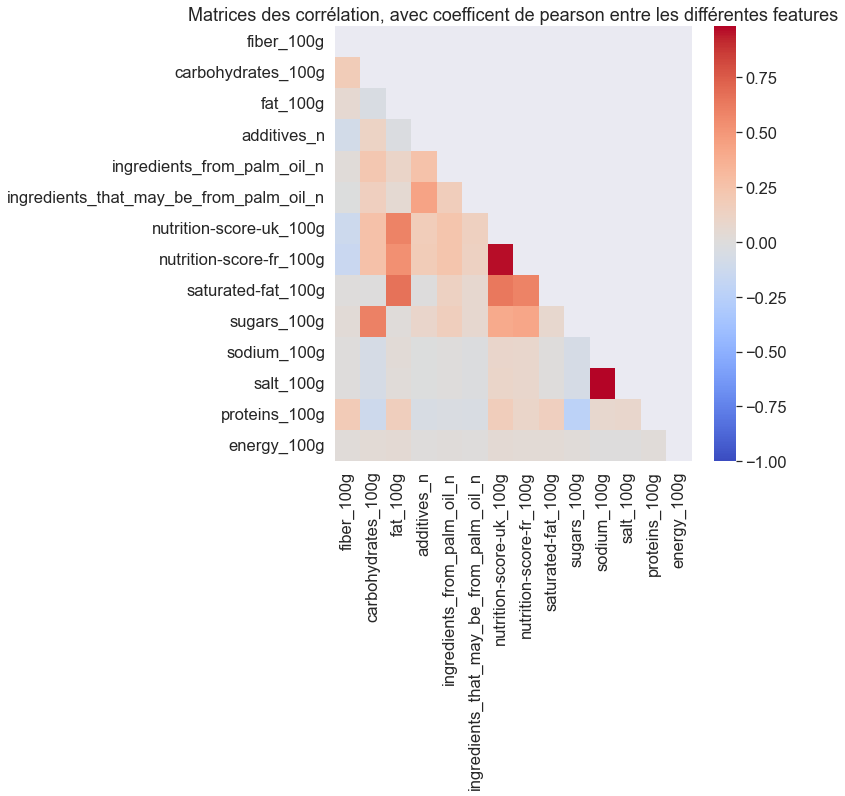

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrices des corrélation, avec coefficent de pearson entre les différentes features')

corr = DFF_FINAL[variables_quantitatives_pertinentes].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

Analyse en composantes principales (ACP)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data_pca = train.copy()
data_pca.drop(columns = ["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"], inplace = True)
features = data_pca.columns
features
data_pca

,fiber_100g,carbohydrates_100g,fat_100g,additives_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
6,0.000,10.40,0.0,2.0,2.0,13.0,0.00,10.40,0.010000,0.0254,0.000,177.0
9,1.500,55.00,23.0,5.0,12.0,12.0,2.50,26.00,0.259843,0.6600,6.000,1900.0
10,1.800,56.00,19.0,5.0,13.0,13.0,2.50,28.00,0.255906,0.6500,5.800,1768.0
11,1.500,60.00,15.0,11.0,12.0,12.0,2.00,34.00,0.236220,0.6000,4.900,1670.0
13,1.700,51.00,23.0,3.0,22.0,22.0,10.00,39.00,0.216535,0.5500,8.000,1868.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70858,6.500,41.40,15.0,1.0,10.0,10.0,9.00,5.10,0.354331,0.9000,6.000,1309.0
70861,0.600,10.20,0.5,0.0,-3.0,4.0,0.00,9.20,0.011811,0.0300,0.600,192.0
70865,0.005,95.87,1.3,4.0,4.0,4.0,1.28,0.12,0.001969,0.0050,0.040,1017.0
70870,1.470,95.31,1.3,5.0,2.0,2.0,1.28,0.10,0.000394,0.0010,0.004,1031.0


In [ ]:
to_standard = data_pca.values
to_standard
scaler= StandardScaler()
standard = scaler.fit_transform(to_standard)
standard

array([[-0.69951908, -0.7210296 , -0.75773922, ..., -0.26728192,
        -1.05046257, -0.04860037],
       [-0.31585032,  0.91501728,  0.76593518, ..., -0.07427338,
        -0.16133252,  0.03255641],
       [-0.23911656,  0.95169995,  0.50094833, ..., -0.0773148 ,
        -0.19097018,  0.02633894],
       ...,
       [-0.69824018,  2.41423782, -0.67161849, ..., -0.27348642,
        -1.04453503, -0.00903467],
       [-0.32352369,  2.39369553, -0.67161849, ..., -0.27470299,
        -1.04986981, -0.00837524],
       [-0.64836324, -1.08418799, -0.74448988, ..., -0.26728192,
        -0.9763684 , -0.05594828]])

In [ ]:
n_components = 6

In [ ]:
pca = PCA(n_components = n_components)
data_pca = pca.fit_transform(standard)

In [ ]:
pca.explained_variance_ratio_

array([0.29238869, 0.17385676, 0.12960482, 0.11171445, 0.08287125,
       0.07571054])

Ici la 1ère composante *capte* 29% de la variance de nos données initiales, la 2ème 17%, la 3e 14%, etc.

In [ ]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.24, 17.39, 12.96, 11.17,  8.29,  7.57])

In [ ]:
scree_cum = scree.cumsum().round()
scree_cum

array([29., 47., 60., 71., 79., 87.])

In [ ]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

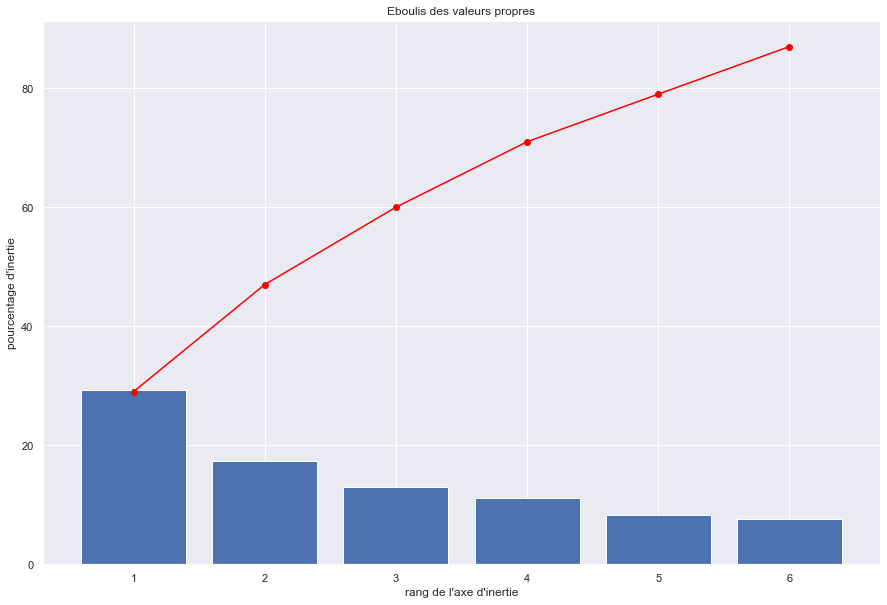

In [ ]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [ ]:
pcs = pca.components_

In [ ]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.004044,0.184122,0.395823,0.146801,0.514627,0.499523,0.420054,0.288680,0.062673,0.062672,0.074445,0.017675
1,-0.073237,-0.237644,0.039099,-0.020180,0.019374,0.003264,0.002632,-0.252637,0.653395,0.653396,0.134482,-0.008386
2,-0.052090,0.451837,-0.390334,0.240759,0.006170,0.057432,-0.320682,0.481329,0.226747,0.226743,-0.376561,-0.018151
3,0.714873,0.411030,0.003352,-0.289409,-0.072275,-0.107796,-0.037232,0.085693,0.085146,0.085145,0.426132,0.120752
4,-0.083256,-0.040116,-0.018344,0.101487,0.001618,0.004529,-0.022608,-0.028823,-0.006478,-0.006478,-0.025077,0.989316
5,-0.087843,-0.030295,0.102736,-0.830766,-0.019305,0.004966,0.148901,0.199893,0.060485,0.060480,-0.463574,0.076783


In [ ]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,fiber_100g,carbohydrates_100g,fat_100g,additives_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
F1,0.00,0.18,0.40,0.15,0.51,0.50,0.42,0.29,0.06,0.06,0.07,0.02
F2,-0.07,-0.24,0.04,-0.02,0.02,0.00,0.00,-0.25,0.65,0.65,0.13,-0.01
F3,-0.05,0.45,-0.39,0.24,0.01,0.06,-0.32,0.48,0.23,0.23,-0.38,-0.02
F4,0.71,0.41,0.00,-0.29,-0.07,-0.11,-0.04,0.09,0.09,0.09,0.43,0.12
F5,-0.08,-0.04,-0.02,0.10,0.00,0.00,-0.02,-0.03,-0.01,-0.01,-0.03,0.99
F6,-0.09,-0.03,0.10,-0.83,-0.02,0.00,0.15,0.20,0.06,0.06,-0.46,0.08


In [ ]:
pcs.T

,F1,F2,F3,F4,F5,F6
fiber_100g,0.004044,-0.073237,-0.052090,0.714873,-0.083256,-0.087843
carbohydrates_100g,0.184122,-0.237644,0.451837,0.411030,-0.040116,-0.030295
fat_100g,0.395823,0.039099,-0.390334,0.003352,-0.018344,0.102736
additives_n,0.146801,-0.020180,0.240759,-0.289409,0.101487,-0.830766
nutrition-score-uk_100g,0.514627,0.019374,0.006170,-0.072275,0.001618,-0.019305
nutrition-score-fr_100g,0.499523,0.003264,0.057432,-0.107796,0.004529,0.004966
saturated-fat_100g,0.420054,0.002632,-0.320682,-0.037232,-0.022608,0.148901
sugars_100g,0.288680,-0.252637,0.481329,0.085693,-0.028823,0.199893
sodium_100g,0.062673,0.653395,0.226747,0.085146,-0.006478,0.060485
salt_100g,0.062672,0.653396,0.226743,0.085145,-0.006478,0.060480


<AxesSubplot:>

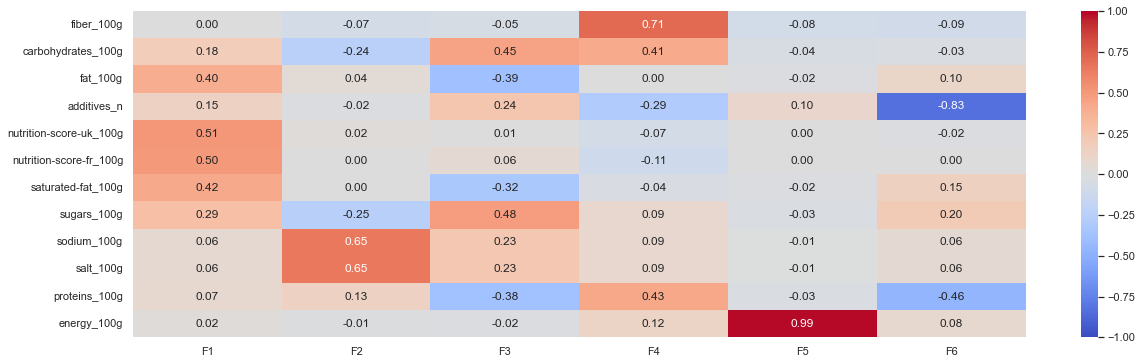

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [ ]:
x, y = 0,1

In [ ]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [ ]:
x_y = (0,1)
x_y

(0, 1)

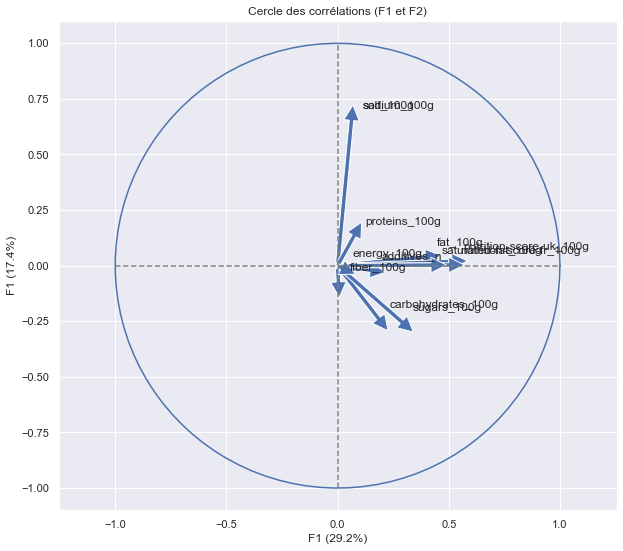

In [ ]:
correlation_graph(pca, x_y, features)

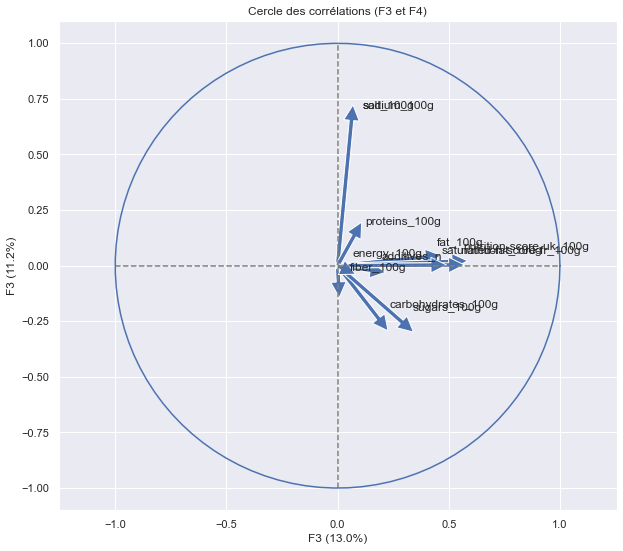

In [ ]:
correlation_graph(pca, (2,3), features)

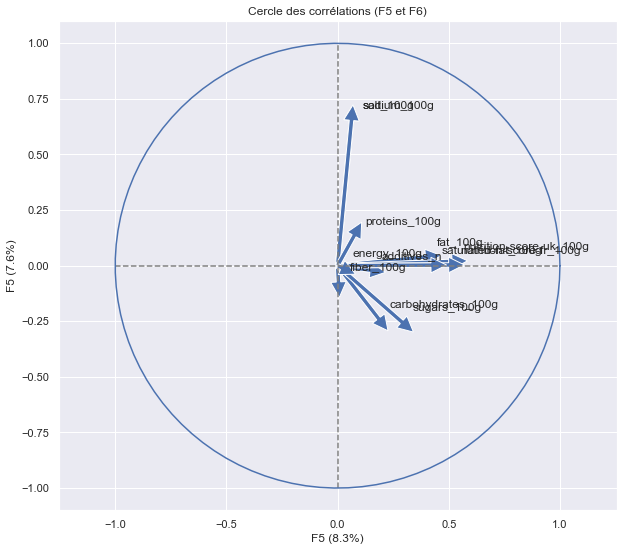

In [ ]:
correlation_graph(pca, (4,5), features)

on observe des corrélations fortes entre certaines features :

Sodium & salt (+++)
Fat & Saturated Fat (++)
Carbohydrates & sugars (+)

## Travail sur l'application proprement dite

## Création de mon garde manger avec le fonction random

In [ ]:
DFF_FINAL

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g,nutrition-score-fr_100g_etalon
0,4,[ lentilles-vertes -> fr:lentilles-vertes ] ...,lentilles vertes,NaN,"Aliments et boissons à base de végétaux,Alimen...",en:plant-based-foods-and-beverages,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...",Aliments et boissons à base de végétaux,Cereals and potatoes,Legumes,1 kg,bertrand-lejeune,Bertrand Lejeune,lentilles vertes,1441186657,"A compléter,Informations nutritionnelles à com...",France,5200016,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False,47.0
1,6,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",fr:sables,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",Sablés,Sugary snacks,Biscuits and cakes,1 kg,st-michel,St Michel,Biscuits sablés fourrage au cacao,1462806432,"A vérifier,Complet,Informations nutritionnelle...",France,7730009,2.456667e+00,78.033333,3.720000,3.000000,0.0,1.000000e+00,13.0,17.000000,2.793333,40.100000,0.258331,0.656500,7.663333,1598.833333,False,42.0
2,8,[ the-noir-de-chine -> fr:the-noir-de-chine ...,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,"Aliments et boissons à base de végétaux,Boisso...",en:teas,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...",Thés,Beverages,Non-sugared beverages,75 g,alice-delice,Alice Délice,Thé de Noël aromatisé orange-cannelle,1370977431,"A vérifier,Complet,Informations nutritionnelle...",France,10090206,1.900000e+00,42.133333,17.200000,0.000000,0.0,0.000000e+00,14.0,14.000000,2.866667,27.466667,0.116320,0.295453,7.733333,1424.400000,False,47.0
3,9,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,"Sirops,Sirops-pour-ganache",en:syrups,"Sirops,Sirops pour ganache","en:syrups,fr:sirops-pour-ganache",Sirops,unknown,unknown,4 x 5 cl,alice-delice,Alice Délice,Sirops pour ganache macarons,1462616704,"A vérifier,Complet,Informations nutritionnelle...",France,10127735,-2.220446e-16,31.400000,21.733333,4.000000,0.0,0.000000e+00,15.0,18.666667,5.110000,24.400000,12.160000,30.925733,28.433333,1479.666667,False,39.0
4,10,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alice-delice,Alice Délice,Mini Confettis,1487325954,"A compléter,Informations nutritionnelles compl...",France,10187319,9.000000e-01,97.033333,0.200000,0.666667,0.0,2.775558e-17,14.0,14.000000,0.800000,87.700000,0.003937,0.010000,0.600000,1753.000000,False,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70875,94475,NaN,NaN,a,"Aliments et boissons à base de végétaux,Alimen...",en:breads,"Biscottes au sarrasin,Biscottes","en:plant-based-foods-and-beverages,en:plant-ba...",Pains,Cereals and potatoes,Bread,NaN,le-pain-des-fleurs,Le Pain des fleurs,Tartines craquantes bio au sarrasin,1437817626,"A compléter,Informations nutritionnelles compl...",France,9847548283004,5.900000e+00,74.800000,2.800000,1.333333,0.0,2.775558e-17,-4.0,-4.000000,0.600000,2.600000,0.267717,0.680000,13.000000,1643.000000,False,80.0
70876,94477,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,biosic,Biosic,Amandes,1491079938,"A compléter,Informations nutritionnelles compl...",France,9900000000233,1.220000e+01,27.806667,

In [ ]:
DFF_FINAL["pnns_groups_2"].isna().sum()

13748

In [ ]:
MonmauvaisProduit = DFF_FINAL.sample(n=1)
# DFF_FINAL.drop(index = MonmauvaisProduit.index, axis = 0, inplace=True)

In [ ]:
MonmauvaisProduit

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g,nutrition-score-fr_100g_etalon
58002,74952,[ produit-de-lactoserum -> fr:produit-de-lact...,"Produit de lactosérum, lait écrémé, sirop de g...",b,"Produits laitiers,Desserts,Desserts lactés,Mou...",en:desserts,"Desserts,Produits laitiers,Mousses lactées","en:dairies,en:desserts,en:dairy-desserts,en:da...",Desserts,Milk and dairy products,Dairy desserts,200 g,milchfrisch,Milchfrisch,Cacao Dessert Milchfrish,1388610719,"A compléter,Informations nutritionnelles compl...",France,4002971266207,0.0,13.466667,0.466667,5.0,0.0,1.0,2.0,2.0,0.6,13.5,0.03937,0.1,1.0,335.0,False,69.0


In [ ]:
# Entrainement  On calcule en fait la moyenne et l'écart type pour chaque colonne
scaler = StandardScaler().fit(DFF_FINAL[variables_quantitatives_pertinentes])
# On scale entre 0 et 1 toutes les valeurs quantitatives
scaled_trained = scaler.transform(DFF_FINAL[variables_quantitatives_pertinentes])
MonmauvaisProduit_scaled = scaler.transform(MonmauvaisProduit[variables_quantitatives_pertinentes])

In [ ]:
# On cherche les n voisins plus proches de mon individu choisi
from sklearn.neighbors import NearestNeighbors
voisin = NearestNeighbors(n_neighbors=3)
# on entraine... (en fait on calcule moyennes et variances)
voisin.fit(scaled_trained)
# on "entraine", au sens ici où l'on recherche les voisins dans la base donnée
# voisin.fit(DFF_FINAL[variables_quantitatives_pertinentes])

NearestNeighbors(n_neighbors=3)

In [ ]:
# On cherche les voisins les plus proches.
distances, indexes = voisin.kneighbors(MonmauvaisProduit_scaled)
indexes
distances


array([[0.        , 0.23122812, 0.24828862]])

In [ ]:
DFF_FINAL.iloc[indexes[0]]

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g,nutrition-score-fr_100g_etalon
58002,74952,[ produit-de-lactoserum -> fr:produit-de-lact...,"Produit de lactosérum, lait écrémé, sirop de g...",b,"Produits laitiers,Desserts,Desserts lactés,Mou...",en:desserts,"Desserts,Produits laitiers,Mousses lactées","en:dairies,en:desserts,en:dairy-desserts,en:da...",Desserts,Milk and dairy products,Dairy desserts,200 g,milchfrisch,Milchfrisch,Cacao Dessert Milchfrish,1388610719,"A compléter,Informations nutritionnelles compl...",France,4002971266207,0.000000,13.466667,0.466667,5.0,0.000000e+00,1.0,2.0,2.0,0.6,13.5,0.03937,0.1,1.0,335.0,False,69.0
33398,43351,[ eau -> fr:eau ] [ jus-concentre-d-orange ...,"eau, jus concentré d'orange ( 17% de fruit rec...",b,NaN,NaN,NaN,NaN,NaN,unknown,unknown,50cl,NaN,NaN,Caresse Antillaise Orange,1454687043,"A compléter,Informations nutritionnelles compl...",Martinique,3291337601443,0.166667,11.000000,0.000000,5.0,-3.469447e-18,1.0,2.0,2.0,0.0,11.0,0.00000,0.0,0.0,187.0,False,69.0
7131,11261,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"_Lait_ écrémé, eau, sucre (7,2%), crème (_lait...",b,"Produits laitiers,Yaourts,Yaourts à boire",en:drinkable-yogurts,"Produits laitiers,Yaourts,Yaourts à boire","en:dairies,en:yogurts,en:drinkable-yogurts",Yaourts à boire,Milk and dairy products,Milk and yogurt,550 g (515 ml),danone,Danone,Star Wars saveur Fraise,1430936175,"A vérifier,Complet,Informations nutritionnelle...",France,3033491013072,0.000000,12.300000,0.700000,5.0,0.000000e+00,1.0,1.0,1.0,0.5,12.2,0.03937,0.1,2.3,285.0,False,71.0


Recherche d'individus voisins grâce à une KNN

Test de fiabilité du remplissage du dataframe par KNN en cherchant des produits uniquement dans le DFF_rempli

In [ ]:
MonmauvaisProduit2 = DFFrempli.sample(n=1)
# DFF_FINAL.drop(index = MonmauvaisProduit.index, axis = 0, inplace=True)
MonmauvaisProduit2

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
39188,50767,[ farine-de-riz -> fr:farine-de-riz ] [ far...,"Farine de riz (44%), amidon de maïs (21%), mal...",b,"Aliments pour bébé,Céréales pour bébé,Dès 4 mois",en:baby-foods,"Aliments pour bébé,Céréales pour bébé,Dès 04 mois","en:baby-foods,en:cereals-for-babies,en:from-4-...",Aliments pour bébé,unknown,unknown,200 g,picot,Picot,Multicéréales,1424982227,"A vérifier,Complet,Informations nutritionnelle...",France,3401548125229,1.0,89.1,0.2,3.0,0.0,0.0,2.0,2.0,0.0,6.0,0.013,0.03302,4.0,1598.0,False


In [ ]:
# Entrainement  On calcule en fait la moyenne et l'écart type pour chaque colonne
scaler2 = StandardScaler().fit(DFFrempli[variables_quantitatives_pertinentes])
# On scale entre 0 et 1 toutes les valeurs quantitatives
scaled_trained2 = scaler.transform(DFFrempli[variables_quantitatives_pertinentes])
MonmauvaisProduit2_scaled = scaler2.transform(MonmauvaisProduit2[variables_quantitatives_pertinentes])

In [ ]:
# On cherche les n voisins plus proches de mon individu choisi
from sklearn.neighbors import NearestNeighbors
voisin2 = NearestNeighbors(n_neighbors=3)
# on entraine... (en fait on calcule moyennes et variances)
voisin2.fit(scaled_trained2)
# on "entraine", au sens ici où l'on recherche les voisins dans la base donnée
# voisin.fit(DFF_FINAL[variables_quantitatives_pertinentes])

NearestNeighbors(n_neighbors=3)

In [ ]:
# On cherche les voisins les plus proches.
distances2, indexes2 = voisin2.kneighbors(MonmauvaisProduit2_scaled)
indexes
distances2

array([[0.32206894, 0.34103252, 0.35139065]])

In [ ]:
DFFrempli.iloc[indexes2[0]]

,Unnamed: 0,additives,ingredients_text,nutrition_grade_fr,categories_fr,main_category,categories,categories_tags,main_category_fr,pnns_groups_1,pnns_groups_2,quantity,brands_tags,brands,product_name,created_t,states_fr,countries,code,fiber_100g,carbohydrates_100g,fat_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-uk_100g,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,imputé_energy_100g
34094,44236,[ eau -> fr:eau ] [ bouillon-de-volaille ->...,"Eau, bouillon de volaille (eau, os de goulet,...",c,"Frais,Plats préparés,Plats à base de viande,Pl...",en:meals-with-meat,"Frais,Plats préparés,Plats à base de viande,Pl...","en:fresh-foods,en:meals,en:meals-with-meat,en:...",Plats à base de viande,Composite foods,One-dish meals,270g,fleury-michon,Fleury Michon,Jôel Robuchon Le Risotto aux champignons et ca...,1450343981,"A vérifier,Complet,Informations nutritionnelle...",France,3302744758023,0.5,16.0,8.3,0.0,0.0,0.0,3.0,3.0,3.5,2.1,0.287402,0.73,8.7,727.0,False
18566,25468,[ risotto-cremeux-70 -> fr:risotto-cremeux-70...,"RISOTTO CRÉMEUX 70 % [riz cuit 20 % (eau, riz)...",c,"Frais,Plats préparés,Plats préparés à réchauff...",en:meals,"Plats préparés,Plats préparés à réchauffer au ...","en:fresh-foods,en:meals,en:microwave-meals,en:...",Plats préparés,Composite foods,One-dish meals,300 g,marie,Marie,Noix de St-Jacques au Pesto & Risotto Crémeux,1395661327,"A vérifier,Complet,Informations nutritionnelle...",France,3248830689591,0.5,8.7,8.5,0.0,0.0,0.0,4.0,4.0,4.5,1.2,0.275591,0.70,7.3,594.0,False
6495,10467,[ lactoserum-reconstitue-de-brebis -> fr:lact...,"Lactosérum reconstitué de brebis, _lait_ recon...",c,Fromage-frais-brousse,fr:fromage-frais-brousse,Fromage frais Brousse,fr:fromage-frais-brousse,Fromage-frais-brousse,unknown,unknown,500 g,"corsica,snc-fromagere-corse","Corsica,SNC Fromagère Corse",Brousse Corsica,1481551458,"A vérifier,Complet,Informations nutritionnelle...",France,3023260005896,0.0,5.0,7.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,0.354331,0.90,9.5,506.0,False


ANOVA pour le nutrition score par pays. 

In [ ]:
DFF_FINAL["pnns_groups_1"].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages', 'unknown',
       nan, 'Fish Meat Eggs', 'Fruits and vegetables', 'Fat and sauces',
       'Salty snacks', 'Composite foods', 'fruits-and-vegetables',
       'Milk and dairy products', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [ ]:
DFF_FINAL['nutrition-score-fr_100g_etalon'] = ((40 - DFF_FINAL['nutrition-score-fr_100g'])*(100/55)).round(0)
DFF_FINAL['nutrition-score-fr_100g_etalon'].isna().sum()

0

In [ ]:
DFF_FINAL["pnns_groups_1"] = DFF_FINAL["pnns_groups_1"].replace('cereals-and-potatoes', 'Cereals and potatoes')
DFF_FINAL["pnns_groups_1"] = DFF_FINAL["pnns_groups_1"].replace('sugary-snacks', 'Sugary snacks')
DFF_FINAL["pnns_groups_1"] = DFF_FINAL["pnns_groups_1"].replace('fruits-and-vegetables', 'Fruits and vegetables')

In [ ]:
DFF_FINAL["pnns_groups_1"].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages', 'unknown',
       nan, 'Fish Meat Eggs', 'Fruits and vegetables', 'Fat and sauces',
       'Salty snacks', 'Composite foods', 'Milk and dairy products'],
      dtype=object)

In [ ]:
# DFF_FINAL[DFF_FINAL["pnns_groups_1"] == 'fruits-and-vegetables'] = 'Fruits and vegetables'
# DFF_FINAL[DFF_FINAL["pnns_groups_1"] == 'cereals-and-potatoes'] = 'Cereals and potatoes'
# DFF_FINAL[DFF_FINAL["pnns_groups_1"] == 'sugary-snacks'] = 'Sugary snacks'

In [ ]:
X = "pnns_groups_1" # qualitative
Y = "nutrition-score-fr_100g_etalon" # quantitative

# On garde que le nutriscore
sous_echantillon = DFF_FINAL.copy()
sous_echantillon = sous_echantillon.loc[sous_echantillon["pnns_groups_1"] != "unknown", :]


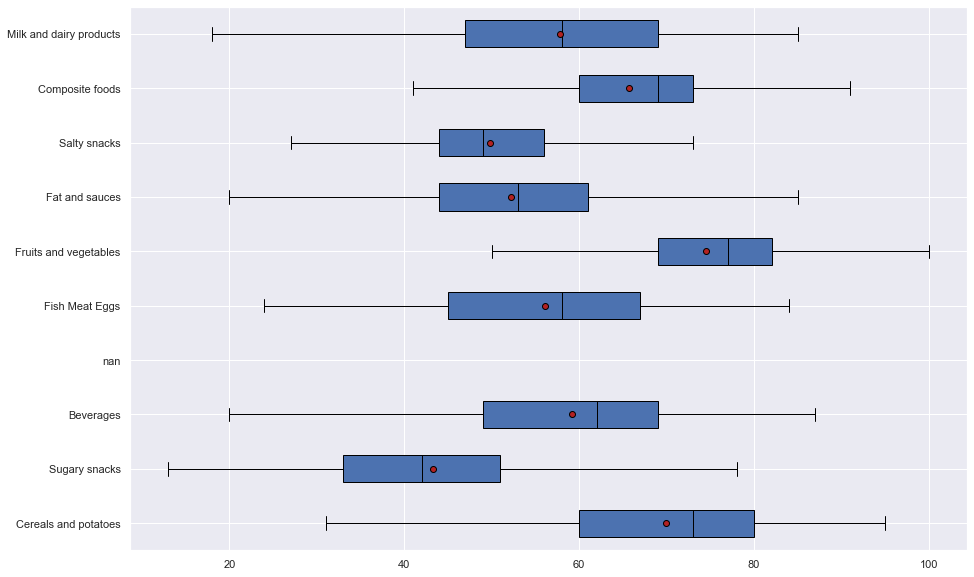

In [ ]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
DF1_rempli = df1[df1[variables_quantitatives_pertinentes].isnull().sum(axis=1) ==0]
# DF1_rempli.head(5)

NameError: name 'df1' is not defined

In [ ]:
DF1_rempli['nutrition-score-fr_100g'].isna().sum()

0

In [ ]:
DF1_rempli['countries_fr'].unique()

array(['États-Unis', 'France,États-Unis', 'Canada', 'Royaume-Uni',
       'France', 'Allemagne', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni',
       'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Belgique,France',
       'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Royaume-Uni,États-Unis', 'États-Unis,en:Pays-bas',
       'Espagne,Royaume-Uni,en:Scotland', nan, 'Mexique',
       'Suisse,États-Unis', 'France,Suisse,États-Unis',
       'Danemark,États-Unis,en:Spanien', 'Suisse', 'Belgique,Suisse',
       'France,Allemagne', 'Malaisie,États-Unis',
       'Belgique,Suisse,États-Unis', 'Cuba', 'Australie,États-Unis',
       'Canada,États-Unis', 'Italie,États-Unis', 'Suisse,Royaume-Uni',
       'Espagne,États-Unis', 'Espagne', 'Émirats arabes unis',
       'Chine,Suisse', 'Pays-Bas,États-Unis', 'Saint-Pierre-et-Miquelon',
       'Italie', 'Canada,Quebec', 'Royaume-Uni,en:Czech', 'Canada,Fra

In [ ]:
listepays2 = ('Italie','Pays-Bas', 'Turquie', 'Mexique', 'États-Unis','Canada', 'Royaume-Uni','France', 'Allemagne')

In [ ]:
dfCompare = tri_pays(df1, listepays2)
dfCompare.shape

(77862, 162)

In [ ]:
DFCompare_rempli = dfCompare[dfCompare[variables_quantitatives_pertinentes].isnull().sum(axis=1) ==0]
DFCompare_rempli.shape

(23607, 162)

In [ ]:
DFCompare_rempli['countries'].unique()

array(['Canada', 'France', 'États-Unis', 'Royaume-Uni', 'Pays-Bas',
       'Italie', 'Allemagne', 'Turquie'], dtype=object)

In [ ]:
X = "countries" # qualitative
Y = "nutrition-score-fr_100g_etalon" # quantitative

# On garde que le nutriscore
sous_echantillon = DFCompare_rempli.copy()
# sous_echantillon = sous_echantillon.loc[sous_echantillon["pnns_groups_"] != "unknown", :]


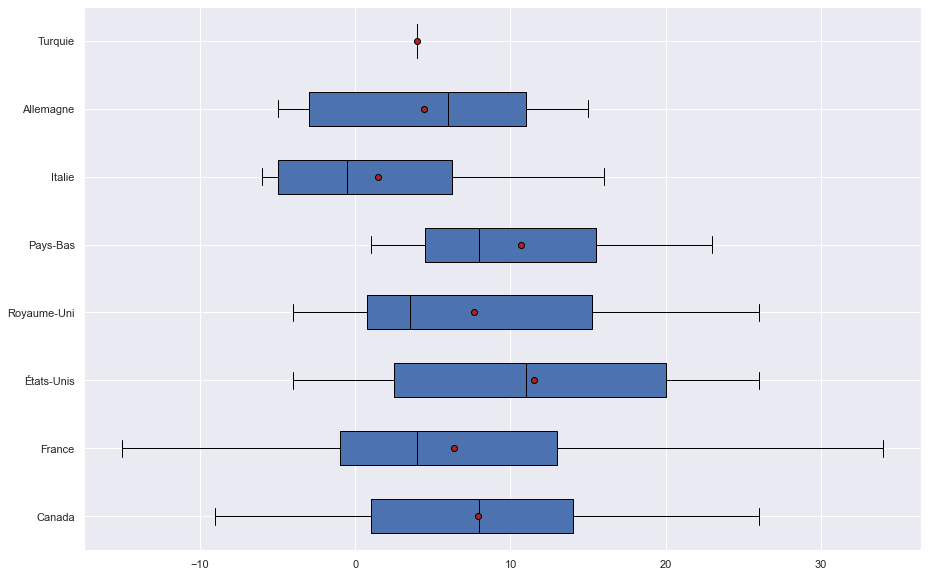

In [ ]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()